In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
import geocoder
import re
from pywaffle import Waffle

In [4]:
low_memory=False
df = pd.read_csv('hate_crime.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               201403 non-null  int64  
 1   DATA_YEAR                 201403 non-null  int64  
 2   ORI                       201403 non-null  object 
 3   PUB_AGENCY_NAME           201403 non-null  object 
 4   PUB_AGENCY_UNIT           5594 non-null    object 
 5   AGENCY_TYPE_NAME          201403 non-null  object 
 6   STATE_ABBR                201403 non-null  object 
 7   STATE_NAME                201403 non-null  object 
 8   DIVISION_NAME             201403 non-null  object 
 9   REGION_NAME               201403 non-null  object 
 10  POPULATION_GROUP_CODE     201403 non-null  object 
 11  POPULATION_GROUP_DESC     201403 non-null  object 
 12  INCIDENT_DATE             201403 non-null  object 
 13  ADULT_VICTIM_COUNT        35973 non-null   f

In [6]:
races = df['OFFENDER_RACE'].value_counts().reset_index()

In [7]:
races

,index,OFFENDER_RACE
0,Unknown,89284
1,White,79514
2,Black or African American,25956
3,Multiple,4047
4,Asian,1453
5,American Indian or Alaska Native,1095
6,Native Hawaiian or Other Pacific Islander,35


In [8]:
bias_races = df['BIAS_DESC'].value_counts().reset_index()

In [9]:
conditions = [
    (df['OFFENDER_RACE'] == 'Unknown'),
    (df['OFFENDER_RACE'] == 'White'),
    (df['OFFENDER_RACE'] == 'Black or African American'),
    (df['OFFENDER_RACE'] == 'Multiple'),
    (df['OFFENDER_RACE'] == 'Asian'),
    (df['OFFENDER_RACE'] == 'American Indian or Alaska Native'),
    (df['OFFENDER_RACE'] == 'Native Hawaiian or Other Pacific Islander')
    ]

values = ['1', '2', '3', '4', '5', '6', '7']

df['RACE_NUM'] = np.select(conditions, values)

In [10]:
conditions = [(df['BIAS_DESC'] == 'Anti-Black or African American'),
              (df['BIAS_DESC'] == 'Anti-Jewish'),
              (df['BIAS_DESC'] == 'Anti-White'),
              (df['BIAS_DESC'] == 'Anti-Gay (Male)'),
              (df['BIAS_DESC'] == 'Anti-Hispanic or Latino'),
              (df['BIAS_DESC'] == 'Anti-Other Race/Ethnicity/Ancestry'),
              (df['BIAS_DESC'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'),
              (df['BIAS_DESC'] == 'Anti-Multiple Races, Group'),
              (df['BIAS_DESC'] == 'Anti-Lesbian (Female)'),
              (df['BIAS_DESC'] == 'Anti-Islamic (Muslim)'),]

values = ['1', '2', '3', '4', '5', '6', '4', '8', '4', '10']

df['BIAS_NUM'] = np.select(conditions, values)

In [11]:
dfLGBQT = df.loc[df['BIAS_NUM'] == '4']
dfLGBQT

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,RACE_NUM,BIAS_NUM
36,26,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,1,Simple Assault,1.0,Restaurant,Anti-Gay (Male),Individual,S,S,3,4
112,2780,1991,CO0030200,Littleton,NaN,City,CO,Colorado,Mountain,West,...,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Gay (Male),Individual,S,S,1,4
130,2786,1991,CO0230000,Garfield,NaN,County,CO,Colorado,Mountain,West,...,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-Lesbian (Female),Individual,S,S,1,4
143,111,1991,CO0340100,Durango,NaN,City,CO,Colorado,Mountain,West,...,1,Simple Assault,1.0,Bar/Nightclub,Anti-Lesbian (Female),Individual,S,S,2,4
146,2866,1991,CO0490100,Aspen,NaN,City,CO,Colorado,Mountain,West,...,1,Simple Assault,1.0,Bar/Nightclub,Anti-Gay (Male),Individual,S,S,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201303,387735,2018,WI0720000,Wood,NaN,County,WI,Wisconsin,East North Central,Midwest,...,1,Intimidation,1.0,School-Elementary/Secondary,Anti-Gay (Male),Individual,S,S,2,4
201306,504918,2018,WIMPD0000,Milwaukee,NaN,City,WI,Wisconsin,East North Central,Midwest,...,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Gay (Male),Individual,S,S,3,4
201373,544380,2018,WV0200200,Charleston,NaN,City,WV,West Virginia,South Atlantic,South,...,1,Simple Assault,1.0,Residence/Home,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S,3,4
201392,463518,2018,WV0380000,Pocahontas,NaN,County,WV,West Virginia,South Atlantic,South,...,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S,2,4


In [12]:
df['OFFENDER_RACE'].value_counts().reset_index()

,index,OFFENDER_RACE
0,Unknown,89284
1,White,79514
2,Black or African American,25956
3,Multiple,4047
4,Asian,1453
5,American Indian or Alaska Native,1095
6,Native Hawaiian or Other Pacific Islander,35


In [13]:
df2018 = df.loc[(df['DATA_YEAR'] == 2018)]

len(df2018)

7194

In [14]:
df2018['BIAS_DESC'].value_counts().reset_index().head(20)

,index,BIAS_DESC
0,Anti-Black or African American,1941
1,Anti-Jewish,852
2,Anti-White,801
3,Anti-Gay (Male),740
4,Anti-Hispanic or Latino,492
5,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",302
6,Anti-Other Race/Ethnicity/Ancestry,268
7,Anti-Islamic (Muslim),191
8,Anti-American Indian or Alaska Native,190
9,Anti-Asian,148


In [15]:
conditions = [(df2018['BIAS_DESC'] == 'Anti-Black or African American'),
              (df2018['BIAS_DESC'] == 'Anti-Jewish'),
              (df2018['BIAS_DESC'] == 'Anti-White'),
              (df2018['BIAS_DESC'] == 'Anti-Gay (Male)'),
              (df2018['BIAS_DESC'] == 'Anti-Hispanic or Latino'),
              (df2018['BIAS_DESC'] == 'Anti-Other Race/Ethnicity/Ancestry'),
              (df2018['BIAS_DESC'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'),
              (df2018['BIAS_DESC'] == 'Anti-Multiple Races, Group'),
              (df2018['BIAS_DESC'] == 'Anti-Lesbian (Female)'),
              (df2018['BIAS_DESC'] == 'Anti-Islamic (Muslim)'),
              (df2018['BIAS_DESC'] == 'Anti-Transgender'),
              (df2018['BIAS_DESC'] == 'Anti-Asian'),
              (df2018['BIAS_DESC'] == 'Anti-American Indian or Alaska Native'),
              (df2018['BIAS_DESC'] == 'Anti-Arab'),
              (df2018['BIAS_DESC'] == 'Anti-Other Religion'),]

values = ['1', '2', '1', '3', '2', '4', '3', '1', '3', '2', '3', '1', '1', '1', '2']

df2018['BIAS_GROUP'] = np.select(conditions, values)

<ipython-input-15-cae4ae7973fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018['BIAS_GROUP'] = np.select(conditions, values)


In [16]:
df2018

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,RACE_NUM,BIAS_NUM,BIAS_GROUP
194209,321961,2018,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Intimidation,2.0,Service/Gas Station,Anti-Black or African American,Individual,S,S,1,1,1
194210,305790,2018,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,Simple Assault,1.0,Residence/Home,Anti-White,Individual,S,S,6,3,1
194211,309917,2018,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,Aggravated Assault,1.0,Field/Woods,Anti-Mental Disability,Individual,S,S,2,0,0
194212,379504,2018,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,Robbery,1.0,Government/Public Building,Anti-White,Individual,S,S,6,3,1
194213,347932,2018,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Destruction/Damage/Vandalism of Property,NaN,Church/Synagogue/Temple/Mosque,Anti-Protestant,Religious Organization,S,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,466130,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1,1,1
201399,466159,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S,2,1,1
201400,508677,2018,WV0540200,Vienna,NaN,City,WV,West Virginia,South Atlantic,South,...,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S,1,0,1
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S,2,3,1


In [17]:
dfPOC2018 = df2018.loc[(df2018['BIAS_NUM'] == '1')]
dfLGBT2018 = df2018.loc[(df2018['BIAS_NUM'] == '4')]
dfJEW2018 = df2018.loc[(df2018['BIAS_NUM'] == '2')]
dfWHITE2018 = df2018.loc[(df2018['BIAS_NUM'] == '3')]

print(len(dfPOC2018), 
      len(dfLGBT2018), 
      len(dfJEW2018), 
      len(dfWHITE2018))

1941 1171 852 801


In [132]:
dfPOC2018['STATE_NAME'].value_counts().reset_index()

,index,STATE_NAME
0,California,276
1,New Jersey,218
2,Michigan,137
3,Washington,124
4,Massachusetts,91
5,New York,90
6,Ohio,89
7,Texas,77
8,Kentucky,57
9,Virginia,55


In [18]:
bias_races2018 = df2018['BIAS_DESC'].value_counts().reset_index()

In [19]:
offenders2018 = df2018['OFFENDER_RACE'].value_counts().reset_index()
offenders2018

,index,OFFENDER_RACE
0,White,2891
1,Unknown,2755
2,Black or African American,1177
3,Multiple,215
4,Asian,73
5,American Indian or Alaska Native,52
6,Native Hawaiian or Other Pacific Islander,17


In [14]:
#Create a sample size of 1 000, since working with 200 000 entries is way too time consuming.

dfsample = df.loc[df['BIAS_NUM'] == '1'].sample(1000)

In [15]:
#Iterate over the sample dataframe to obtain the geocoder open street map data.

geocode_list = []

for indice, fila in dfsample.iterrows():
    loc = fila.loc['PUB_AGENCY_NAME'] + ',' + fila.loc['STATE_NAME']
    geocode_list.append(geocoder.osm(loc))

In [16]:
#Split the geocoder data into longitude and latitude

lat = []
lng = []

for i in geocode_list:
    lat.append(i.lat)
    lng.append(i.lng)

In [17]:
#Adding the data to the dataframe

dfsample['LAT'] = lat
dfsample['LNG'] = lng

dfsample.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,RACE_NUM,BIAS_NUM,LAT,LNG
88504,85932,2002,NJNPD0000,Newark,NaN,City,NJ,New Jersey,Middle Atlantic,Northeast,...,0.0,Drug Store/Doctor's Office/Hospital,Anti-Black or African American,Business,S,S,1,1,40.735657,-74.172367
132488,131037,2008,MI5080600,Warren,NaN,City,MI,Michigan,East North Central,Midwest,...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2,1,42.493257,-83.006275
48379,48577,1997,OHCOP0000,Columbus,NaN,City,OH,Ohio,East North Central,Midwest,...,0.0,Parking/Drop Lot/Garage,Anti-Black or African American,Other,S,S,1,1,39.962260,-83.000707
193713,484520,2017,WA0270000,Pierce,NaN,County,WA,Washington,Pacific,West,...,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1,1,46.634353,-119.452175
104807,106133,2004,OR0260200,Portland,NaN,City,OR,Oregon,Pacific,West,...,1.0,Air/Bus/Train Terminal,Anti-Black or African American,Individual,S,S,2,1,45.520247,-122.674195


In [18]:
mapa_us = folium.Map(location=[37.6000,-95],zoom_start=5)
for indice, fila in dfsample.iterrows():
    try:
        folium.Marker(
        location = [fila.loc['LAT'],fila.loc['LNG']],
        ).add_to(mapa_us)
    except ValueError:
        pass

mapa_us

In [62]:
mapa_us.save("index.html")

In [19]:
base_map = folium.Map(location=[37.6000,-95],zoom_start=5)

heat_df = dfsample.dropna(axis=0, subset=['LAT','LNG'])
heat_data = [[row['LAT'],row['LNG']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, name='Hate Crimes commited againts POC').add_to(base_map)

base_map

In [20]:
dfPOC = df.loc[df['BIAS_NUM'] == '1']

In [23]:
location = []

for indice, fila in dfPOC.iterrows():
    location.append(fila.loc['PUB_AGENCY_NAME'] + ', ' + fila.loc['STATE_NAME'])

In [25]:
dfPOC['Location'] = location
dfPOC.head()

<ipython-input-25-930f5108b690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPOC['Location'] = location


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,RACE_NUM,BIAS_NUM,Location
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2,1,"Rogers, Arkansas"
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,3,1,"Pine Bluff, Arkansas"
11,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S,2,1,"Sevier, Arkansas"
12,2,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1,1,"Phoenix, Arizona"
15,5,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2,1,"Phoenix, Arizona"


In [194]:
test2 = dfPOC[['Location','']].value_counts().reset_index()
test2

,index,Location
0,"Los Angeles, California",2425
1,"New York, New York",1540
2,"Boston, Massachusetts",1337
3,"Phoenix, Arizona",1177
4,"Baltimore County Police Department, Maryland",848
...,...,...
6086,"Carthage, Missouri",1
6087,"Shelbyville, Kentucky",1
6088,"Jackson, Louisiana",1
6089,"Phelps, Missouri",1


In [33]:
'''
world_map = folium.Map(location=[37.6000,-95],zoom_start=5)

world_map.choropleth(
        geo_data='vic.geojson',
        data=test,
        columns=['index','Location'],
        key_on='feature.properties.Suburb_Name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Hate Crime POC'
        )
'''

"\nworld_map = folium.Map(location=[37.6000,-95],zoom_start=5)\n\nworld_map.choropleth(\n        geo_data='vic.geojson',\n        data=test,\n        columns=['index','Location'],\n        key_on='feature.properties.Suburb_Name',\n        fill_color='YlOrRd',\n        fill_opacity=0.7,\n        line_opacity=0.2,\n        legend_name='Hate Crime POC'\n        )\n"

In [52]:
Offense = df2018['OFFENSE_NAME'].loc[df2018['RACE_NUM'] == '2']
offense_whites = Offense.value_counts().reset_index()
offense_whites[5:79].sum()

index           Drug Equipment ViolationsAll Other LarcenyShop...
OFFENSE_NAME                                                  454
dtype: object

In [95]:
df2018.loc[(df2018['RACE_NUM'] == '2') & (df2018['BIAS_NUM'] == '1')]
offense_whites_race = df2018['BIAS_DESC'].loc[(df2018['RACE_NUM'] == '2')]
offense_whites_race_count = offense_whites_race.value_counts().reset_index()
top10_whiteraceoffense = offense_whites_race_count[0:10]
top10_whiteraceoffense
offense_whites_race_count[10:].sum()

index        Anti-Lesbian (Female)Anti-Mental DisabilityAnt...
BIAS_DESC                                                  495
dtype: object

In [2]:
df2018.loc[(df2018['RACE_NUM'] == '2') & (df2018['BIAS_NUM'] == '1')]
offense_whites_race = df2018['BIAS_DESC'].loc[(df2018['RACE_NUM'] == '2')]
offense_whites_race_count = offense_whites_race.value_counts().reset_index()
top10_whiteraceoffense = offense_whites_race_count[0:10]
top10_whiteraceoffense
offense_whites_race_count[10:].sum()

NameError: name 'df2018' is not defined

In [1]:
top10_whiteraceoffense

NameError: name 'top10_whiteraceoffense' is not defined

In [124]:
labels4 = []
sizes4 = []

for indice, fila in top10_whiteraceoffense.iterrows():
    labels4.append(fila.loc['index'])
    sizes4.append(fila.loc['BIAS_DESC'])

In [125]:
waffledict = dict(zip(labels4[0:5], sizes4[0:5]))
waffledict

{'Anti-Black or African American': 1081,
 'Anti-Gay (Male)': 264,
 'Anti-White': 237,
 'Anti-Hispanic or Latino': 234,
 'Anti-Jewish': 145}

In [126]:
waffledict['Other']=495

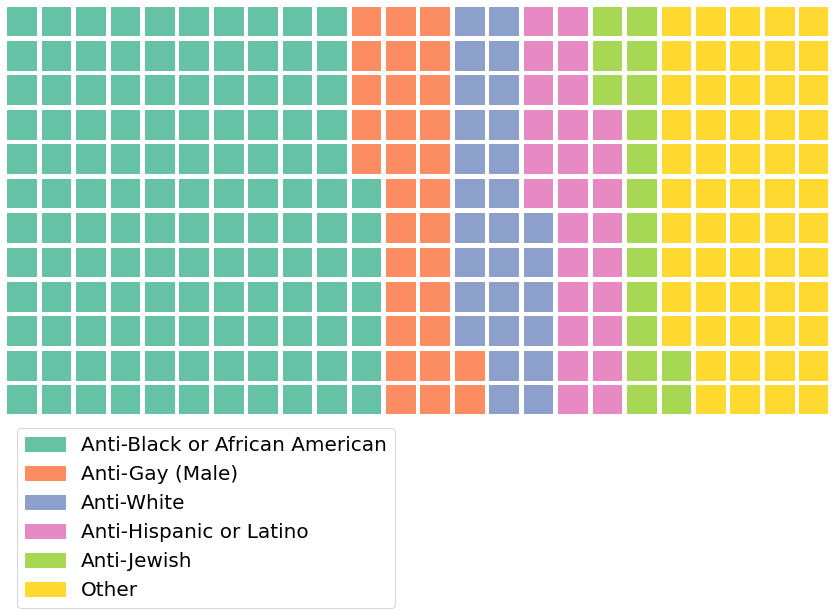

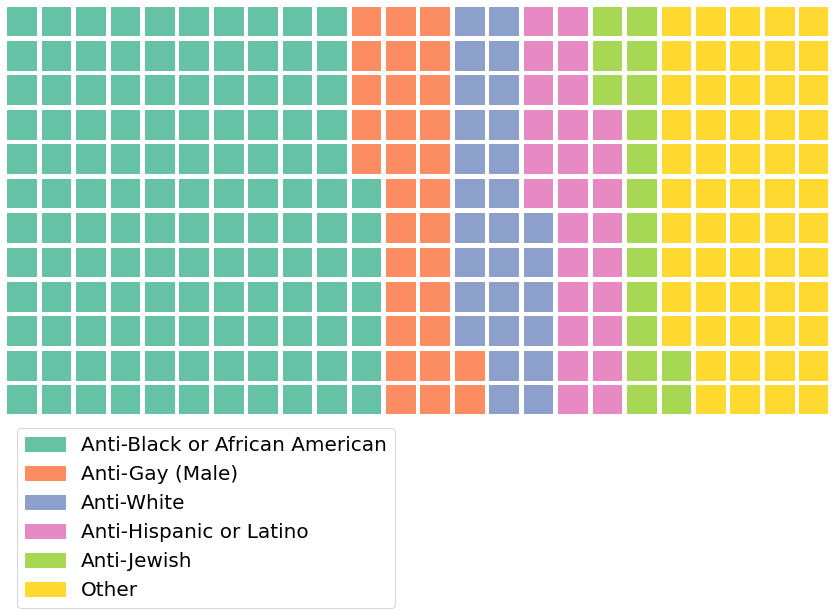

In [129]:
plt.figure(figsize=(12, 14),
    FigureClass=Waffle,
    rows=12,
    columns=24,
    values=waffledict,
    cmap_name="Set2",
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.50)}
)

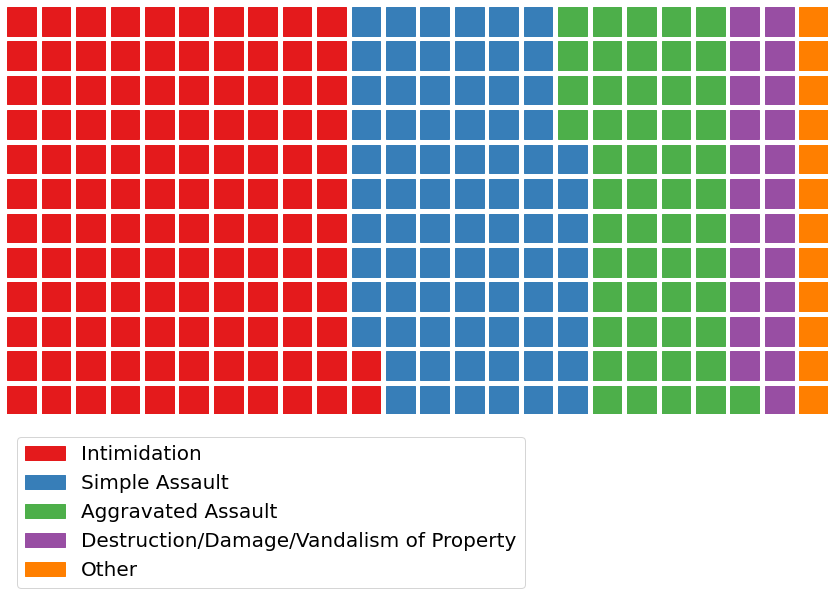

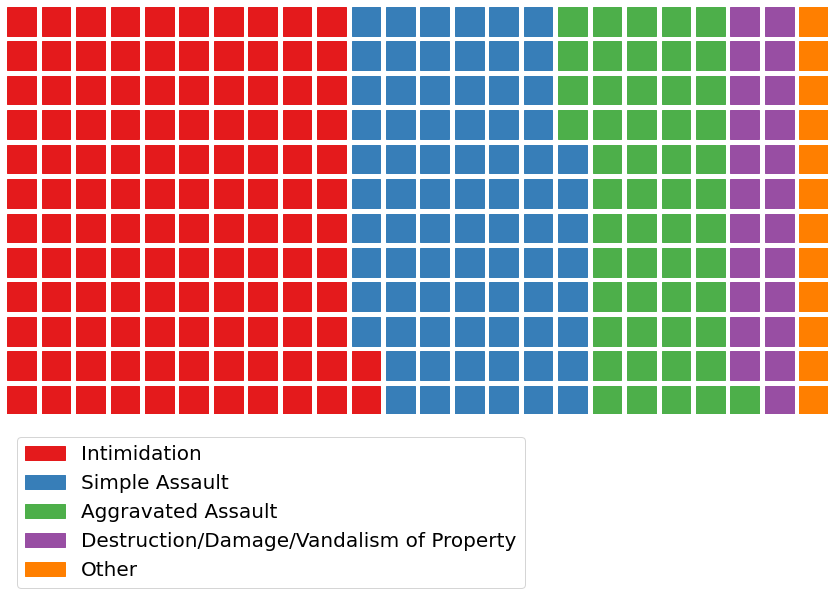

In [121]:
plt.figure(figsize=(12, 14),
    FigureClass=Waffle,
    rows=12,
    columns=24,
    values=waffledict,
    cmap_name="Set1",
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.45)}
)

In [130]:
df2018['STATE_NAME'].loc[(df2018['RACE_NUM'] == '2')

,index,STATE_NAME
0,California,1075
1,New Jersey,569
2,New York,525
3,Washington,521
4,Michigan,437
5,Texas,407
6,Ohio,365
7,Massachusetts,352
8,Kentucky,243
9,District of Columbia,213


In [116]:
plt.figure(figsize=(12, 14))
plt.rcParams.update({'font.size': 20})

labels2 = ['Anti-Sexual Orientation', 'Others']
sizes2 = [1317, 7194]
    
explode = [.1, 0]

plt.pie(sizes2,
        labels = labels2,
        explode = explode,
        autopct='%1.1f%%',
        pctdistance= .84,
        colors=tableau20[13:],
        startangle=90)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

NameError: name 'tableau20' is not defined

<Figure size 864x1008 with 0 Axes>

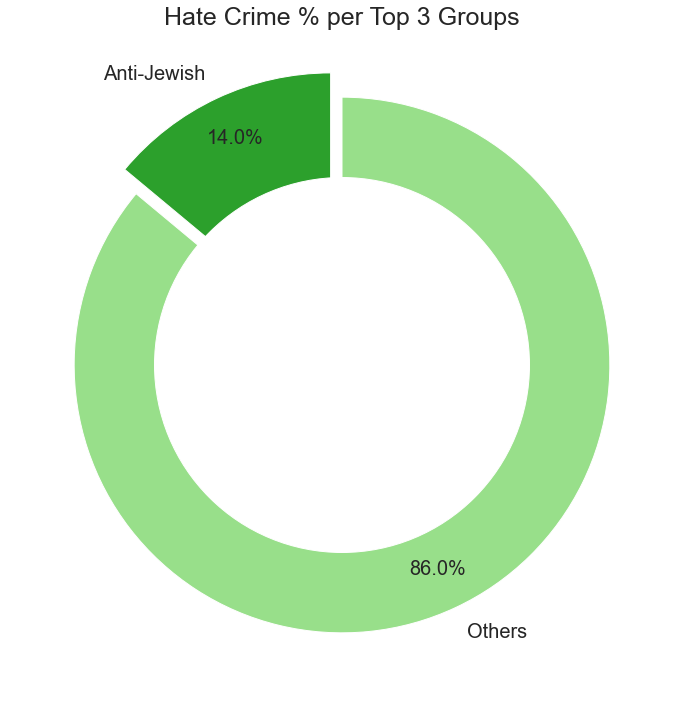

In [405]:
plt.figure(figsize=(12, 14))
plt.rcParams.update({'font.size': 20})

labels2 = ['Anti-Jewish', 'Others']
sizes2 = [852, 5253]
    
explode = [.1, 0]

plt.pie(sizes2,
        labels = labels2,
        explode = explode,
        autopct='%1.1f%%',
        pctdistance= .84,
        colors=tableau20[4:],
        startangle=90)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.title('Hate Crime % per Top 3 Groups',fontdict={'fontsize': 25})
p.gca().add_artist(my_circle)

plt.show()

In [76]:
%matplotlib inline
sns.set_style("darkgrid")

In [21]:
offenders2018

,index,OFFENDER_RACE
0,White,2891
1,Unknown,2755
2,Black or African American,1177
3,Multiple,215
4,Asian,73
5,American Indian or Alaska Native,52
6,Native Hawaiian or Other Pacific Islander,17


In [426]:
labels3 = []
sizes3 = []

for indice, fila in offenders2018.iterrows():
    labels3.append(fila.loc['index'])
    sizes3.append(fila.loc['OFFENDER_RACE'])

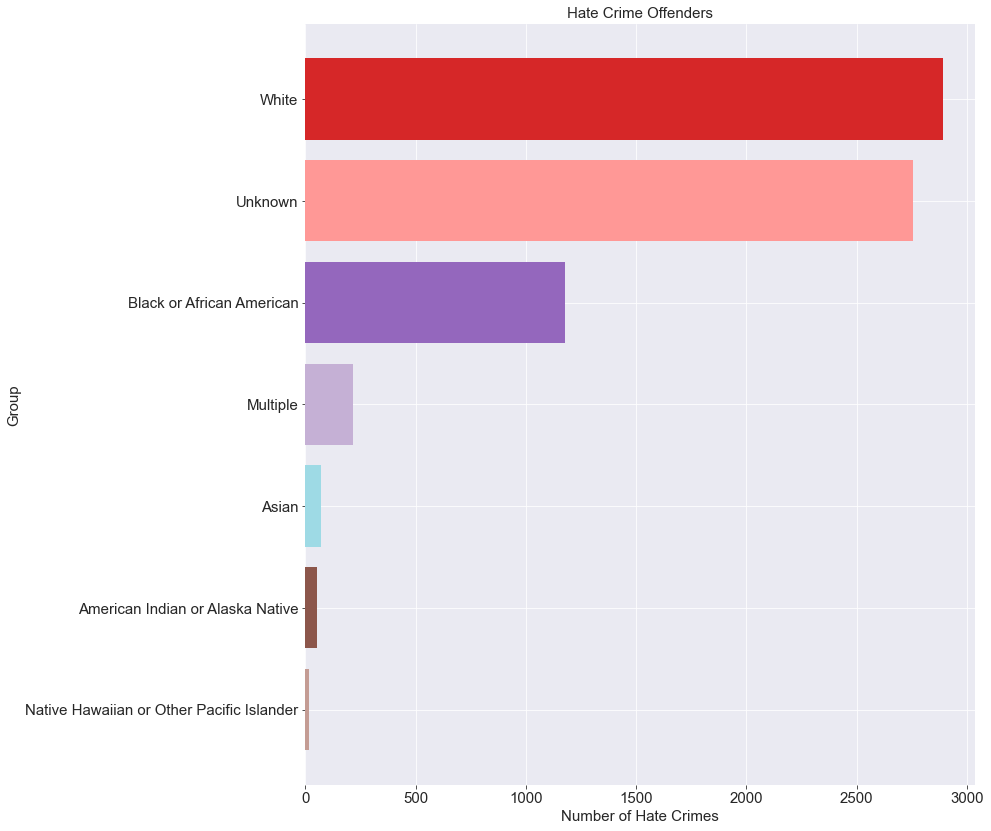

In [432]:
plt.figure(figsize=(12, 14))
plt.rcParams.update({'font.size': 15})

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (158, 218, 229),  (140, 86, 75), 
             (196, 156, 148), (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141), (23, 190, 207)]    
 
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(rotation='horizontal')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Group')
plt.title('Hate Crime Offenders',fontdict={'fontsize': 15})
plt.barh(labels3,sizes3,color=tableau20[6:], edgecolor='none')
plt.gca().invert_yaxis()


In [132]:
bias_races.sum()

index        Anti-Black or African AmericanAnti-JewishAnti-...
BIAS_DESC                                               201403
dtype: object

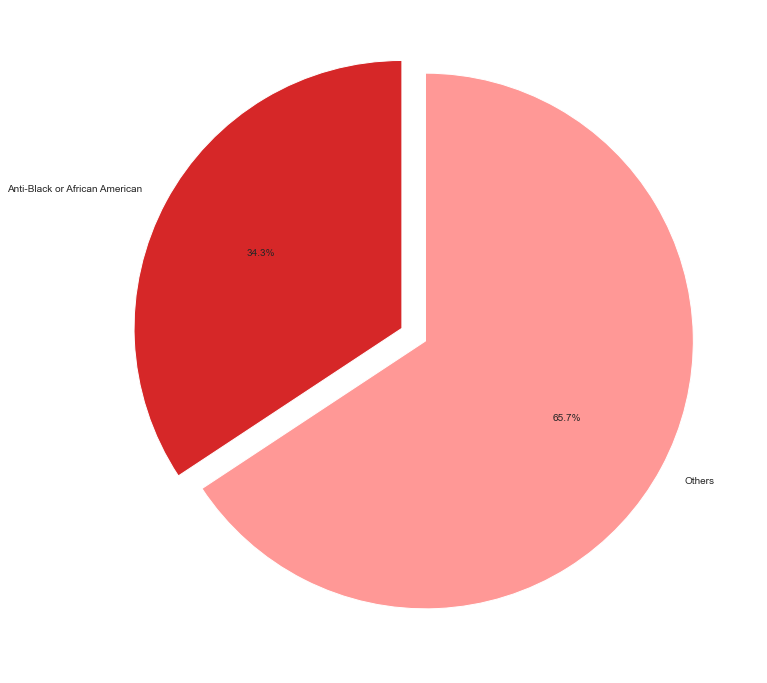

In [149]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

pieraces = plt.pie([69056,132347], labels = ['Anti-Black or African American', 'Others'],explode = [.1,0], colors=tableau20[6:8], autopct='%1.1f%%', startangle=90)

plt.show()

<ipython-input-171-d54b88ab85fa>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


<AxesSubplot:xlabel='State', ylabel='Number of Hate Crimes'>

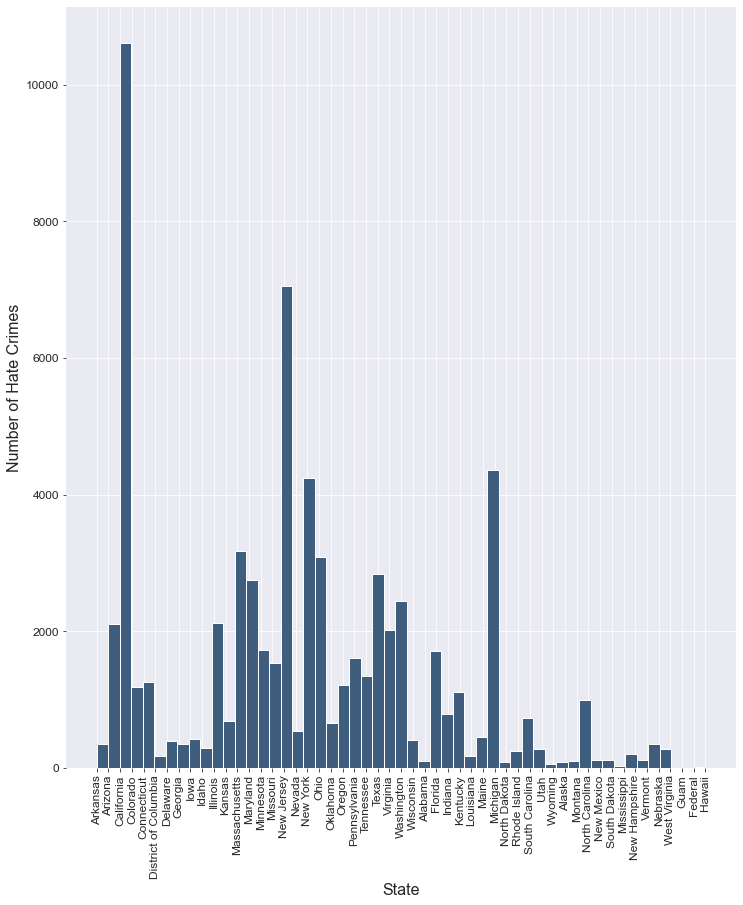

In [171]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.xlabel("State", fontsize=16)  
plt.ylabel("Number of Hate Crimes", fontsize=16)  

plt.xticks(rotation='vertical')
dfPOC['STATE_NAME'].hist(bins=53,color="#3F5D7D")

In [177]:
dfPOC.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,RACE_NUM,BIAS_NUM,Location
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2,1,"Rogers, Arkansas"
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,3,1,"Pine Bluff, Arkansas"
11,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S,2,1,"Sevier, Arkansas"
12,2,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1,1,"Phoenix, Arizona"
15,5,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,2,1,"Phoenix, Arizona"


In [200]:
test.rename(columns={'index':'Location','Location':'Count'}, inplace=True)

In [163]:
POCSTATES = dfPOC2018['STATE_NAME'].value_counts().reset_index()

geocoder_agg = []

for indice, fila in POCSTATES.iterrows():
    loc2 = fila.loc['index']
    geocoder_agg.append(geocoder.osm(loc2))
    
latitude = []
longitude = []

for i in geocoder_agg:
    latitude.append(i.lat)
    longitude.append(i.lng)
    
POCSTATES['LAT'] = latitude
POCSTATES['LNG'] = longitude

POCSTATES

,index,STATE_NAME,LAT,LNG
0,California,276,36.701463,-118.755997
1,New Jersey,218,40.075738,-74.404162
2,Michigan,137,43.621195,-84.682435
3,Washington,124,38.894992,-77.036558
4,Massachusetts,91,42.378877,-72.032366


In [208]:
JEWTATES = dfJEW2018['STATE_NAME'].value_counts().reset_index()

geocoder_agg = []

for indice, fila in JEWTATES.iterrows():
    loc2 = fila.loc['index']
    geocoder_agg.append(geocoder.osm(loc2))
    
latitude = []
longitude = []

for i in geocoder_agg:
    latitude.append(i.lat)
    longitude.append(i.lng)
    
JEWTATES['LAT'] = latitude
JEWTATES['LNG'] = longitude

JEWTATES.sum()

index         New YorkNew JerseyCaliforniaMassachusettsWashi...
STATE_NAME                                                  852
LAT                                                     1452.02
LNG                                                     -3638.8
dtype: object

In [204]:
LGBTSTATES = dfLGBT2018['STATE_NAME'].value_counts().reset_index()

geocoder_agg = []

for indice, fila in LGBTSTATES.iterrows():
    loc2 = fila.loc['index']
    geocoder_agg.append(geocoder.osm(loc2))
    
latitude = []
longitude = []

for i in geocoder_agg:
    latitude.append(i.lat)
    longitude.append(i.lng)
    
LGBTSTATES['LAT'] = latitude
LGBTSTATES['LNG'] = longitude

LGBTSTATES

,index,STATE_NAME,LAT,LNG
0,California,237,36.701463,-118.755997
1,Washington,106,38.894992,-77.036558
2,New York,71,40.712728,-74.006015
3,District of Columbia,68,38.893794,-76.987998
4,Michigan,66,43.621195,-84.682435
5,Massachusetts,62,42.378877,-72.032366
6,Texas,51,31.816038,-99.512099
7,Ohio,49,40.225357,-82.688140
8,New Jersey,46,40.075738,-74.404162
9,Arizona,37,34.395342,-111.763275


In [209]:
LGBTSTATES.sum()

index         CaliforniaWashingtonNew YorkDistrict of Columb...
STATE_NAME                                                 1171
LAT                                                     1815.54
LNG                                                    -4442.62
dtype: object

<ipython-input-198-490a5063ee6d>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([276., 218., 137., 124.,  91.,  90.,  89.,  77.,  57.,  55.,  54.,
         52.,  47.,  45.,  42.,  40.,  39.,  35.,  32.,  26.,  26.,  23.,
         22.,  19.,  16.,  15.,  15.,  14.,  14.,  13.,  12.,  12.,  11.,
         11.,  10.,   9.,   8.,   8.,   8.,   8.,   7.,   7.,   5.,   5.,
          5.,   4.,   3.,   2.,   2.,   1.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <BarContainer object of 50 artists>)

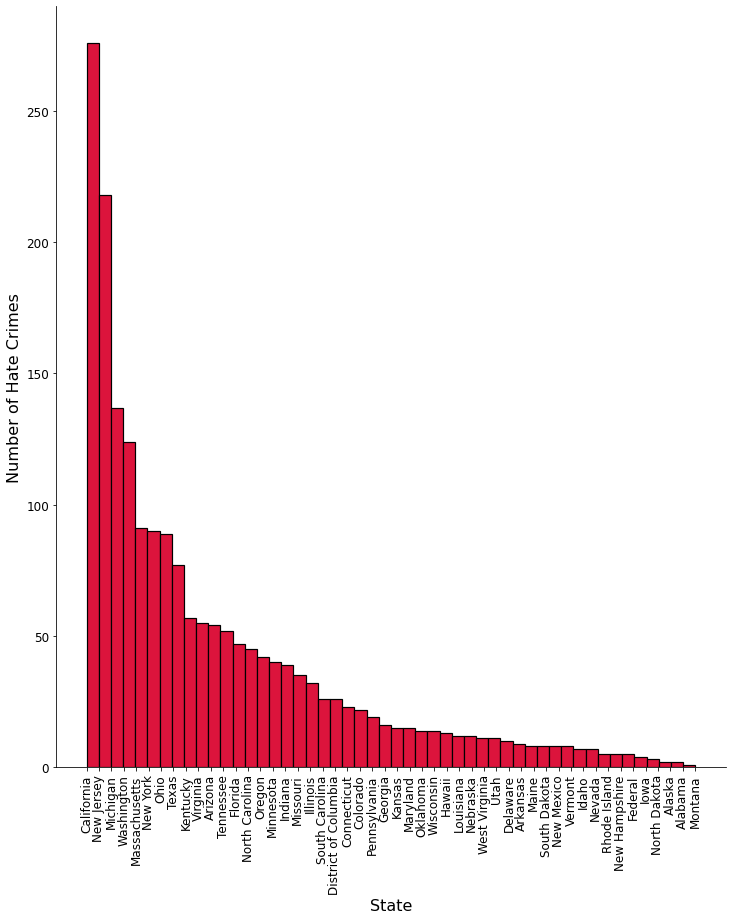

In [198]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.xlabel("State", fontsize=16)  
plt.ylabel("Number of Hate Crimes", fontsize=16)  

plt.xticks(rotation='vertical')
ax.hist(x = POCSTATES2['index'], bins=len(POCSTATES2['index']), weights=POCSTATES2['STATE_NAME'], color="#DC143C",edgecolor='black', linewidth=1.2)

<ipython-input-207-51120b29c42d>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([251., 173., 126.,  53.,  37.,  23.,  19.,  14.,  13.,  13.,  13.,
         11.,   9.,   9.,   9.,   8.,   7.,   7.,   7.,   5.,   5.,   5.,
          4.,   4.,   3.,   3.,   3.,   2.,   2.,   2.,   2.,   2.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.]),
 array([ 0.   ,  0.975,  1.95 ,  2.925,  3.9  ,  4.875,  5.85 ,  6.825,
         7.8  ,  8.775,  9.75 , 10.725, 11.7  , 12.675, 13.65 , 14.625,
        15.6  , 16.575, 17.55 , 18.525, 19.5  , 20.475, 21.45 , 22.425,
        23.4  , 24.375, 25.35 , 26.325, 27.3  , 28.275, 29.25 , 30.225,
        31.2  , 32.175, 33.15 , 34.125, 35.1  , 36.075, 37.05 , 38.025,
        39.   ]),
 <BarContainer object of 40 artists>)

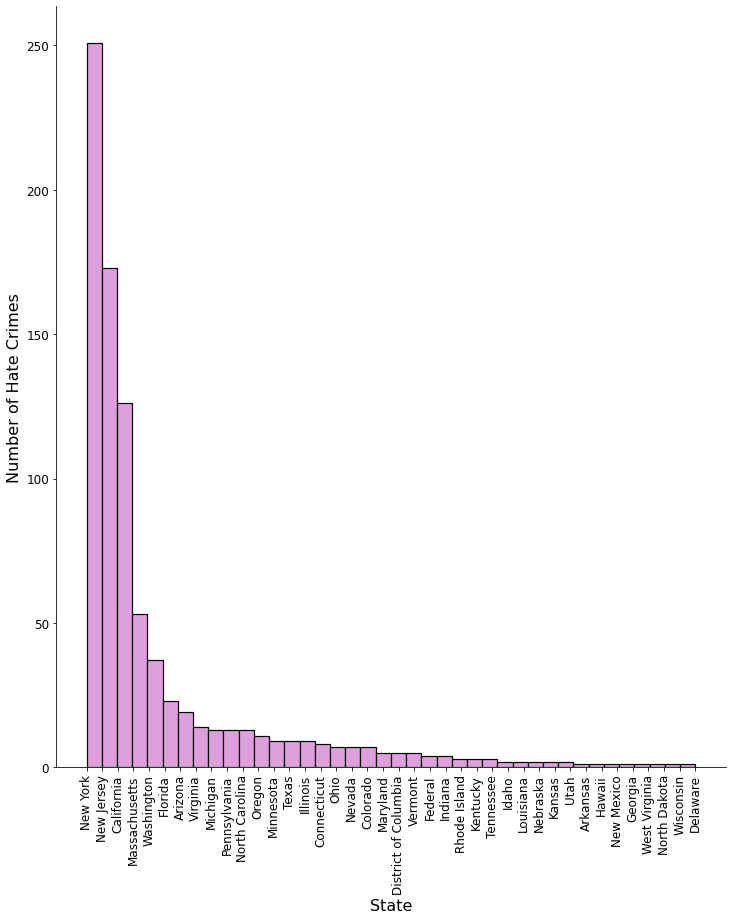

In [207]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.xlabel("State", fontsize=16)  
plt.ylabel("Number of Hate Crimes", fontsize=16)  

plt.xticks(rotation='vertical')
ax.hist(x = JEWTATES['index'], bins=len(JEWTATES['index']), weights=JEWTATES['STATE_NAME'], color="#DDA0DD",edgecolor='black', linewidth=1.2)

<ipython-input-211-ab40331ddcaa>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


(array([237., 106.,  71.,  68.,  66.,  62.,  51.,  49.,  46.,  37.,  35.,
         27.,  26.,  24.,  23.,  21.,  21.,  20.,  19.,  14.,  12.,   9.,
          9.,   8.,   8.,   8.,   8.,   8.,   7.,   6.,   6.,   6.,   5.,
          5.,   4.,   4.,   4.,   4.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   2.,   2.,   1.,   1.]),
 array([ 0.        ,  0.97959184,  1.95918367,  2.93877551,  3.91836735,
         4.89795918,  5.87755102,  6.85714286,  7.83673469,  8.81632653,
         9.79591837, 10.7755102 , 11.75510204, 12.73469388, 13.71428571,
        14.69387755, 15.67346939, 16.65306122, 17.63265306, 18.6122449 ,
        19.59183673, 20.57142857, 21.55102041, 22.53061224, 23.51020408,
        24.48979592, 25.46938776, 26.44897959, 27.42857143, 28.40816327,
        29.3877551 , 30.36734694, 31.34693878, 32.32653061, 33.30612245,
        34.28571429, 35.26530612, 36.24489796, 37.2244898 , 38.20408163,
        39.18367347, 40.16326531, 41.14285714, 42.12244898, 43.10204082,
       

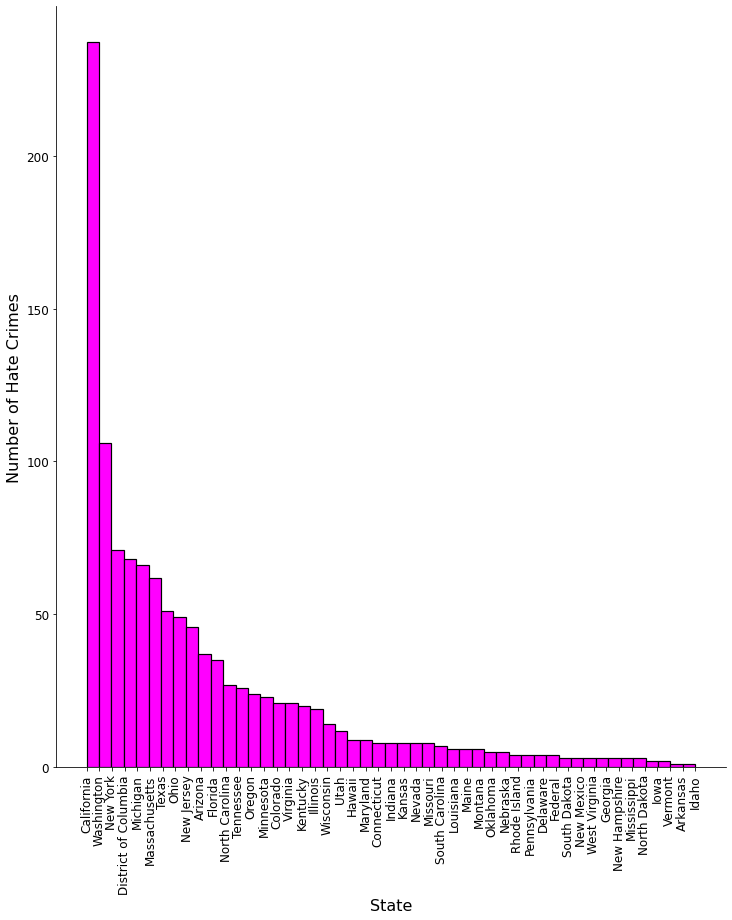

In [211]:
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.xlabel("State", fontsize=16)  
plt.ylabel("Number of Hate Crimes", fontsize=16)  

plt.xticks(rotation='vertical')
ax.hist(x = LGBTSTATES['index'], bins=len(LGBTSTATES['index']), weights=LGBTSTATES['STATE_NAME'], color="#FF00FF",edgecolor='black', linewidth=1.2)

In [161]:
agg_map = folium.Map(location=[37.6000,-95],zoom_start=4)

heat_df = POCSTATES.dropna(axis=0, subset=['LAT','LNG','STATE_NAME'])
heat_data = [[row['LAT'],row['LNG'],row['STATE_NAME']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, name='Hate Crimes commited againts POC', radius=40,blur=20).add_to(agg_map)

agg_map

In [212]:
jews_map = folium.Map(location=[37.6000,-95],zoom_start=4)

heat_df_jews = JEWTATES.dropna(axis=0, subset=['LAT','LNG','STATE_NAME'])
heat_data_jews = [[row['LAT'],row['LNG'],row['STATE_NAME']] for index, row in heat_df_jews.iterrows()]
HeatMap(heat_data_jews, name='Hate Crimes commited againts Jews', radius=40,blur=20).add_to(jews_map)

jews_map

In [213]:
lgbt_map = folium.Map(location=[37.6000,-95],zoom_start=4)

heat_df_lgbt = LGBTSTATES.dropna(axis=0, subset=['LAT','LNG','STATE_NAME'])
heat_data_lgbt = [[row['LAT'],row['LNG'],row['STATE_NAME']] for index, row in heat_df_lgbt.iterrows()]
HeatMap(heat_data_lgbt, name='Hate Crimes commited againts Jews', radius=40,blur=20).add_to(lgbt_map)

lgbt_map

In [237]:
dfPoCSTATES = dfPOC['STATE_NAME'].value_counts().reset_index()

In [262]:
dfPoCSTATES.rename(columns={'index':'STATE','Count':'COUNT'}, inplace=True)
dfPoCSTATES

,STATE,COUNT
0,California,10608
1,New Jersey,7057
2,Michigan,4357
3,New York,4243
4,Massachusetts,3176
5,Ohio,3082
6,Texas,2845
7,Maryland,2753
8,Washington,2441
9,Illinois,2116


In [247]:
census = pd.read_csv('nst-est2019-alldata.csv')

In [272]:
listcensus

[['United States', 328239523],
 ['Northeast Region', 55982803],
 ['Midwest Region', 68329004],
 ['South Region', 125580448],
 ['West Region', 78347268],
 ['Alabama', 4903185],
 ['Alaska', 731545],
 ['Arizona', 7278717],
 ['Arkansas', 3017804],
 ['California', 39512223],
 ['Colorado', 5758736],
 ['Connecticut', 3565287],
 ['Delaware', 973764],
 ['District of Columbia', 705749],
 ['Florida', 21477737],
 ['Georgia', 10617423],
 ['Hawaii', 1415872],
 ['Idaho', 1787065],
 ['Illinois', 12671821],
 ['Indiana', 6732219],
 ['Iowa', 3155070],
 ['Kansas', 2913314],
 ['Kentucky', 4467673],
 ['Louisiana', 4648794],
 ['Maine', 1344212],
 ['Maryland', 6045680],
 ['Massachusetts', 6892503],
 ['Michigan', 9986857],
 ['Minnesota', 5639632],
 ['Mississippi', 2976149],
 ['Missouri', 6137428],
 ['Montana', 1068778],
 ['Nebraska', 1934408],
 ['Nevada', 3080156],
 ['New Hampshire', 1359711],
 ['New Jersey', 8882190],
 ['New Mexico', 2096829],
 ['New York', 19453561],
 ['North Carolina', 10488084],
 ['North D

In [273]:
listpop = [39512223, 8882190, 9986857, 19453561, 6892503, 11689100, 28995881, 6045680, 7614893, 12671821, 
           7278717, 8535519, 5639632, 21477737, 12801989, 6137428, 6829174, 3565287, 4217737, 5758736,
           4467673, 10488084, 6732219, 5148714, 2913314, 3956971, 3080156, 1344212, 3155070, 5822434,
           973764, 3017804, 10617423, 1934408, 1787065, 1792147, 3205958, 1059361, 1359711, 4648794,
           705749, 623989, 2096829, 884659, 4903185, 1068778, 762062, 731545, 578759, 2976149, 1415872,
           0, 0]

In [274]:
dfPoCSTATES['STATE_POP'] = listpop
dfPoCSTATES.head()

,STATE,COUNT,STATE_POP
0,California,10608,39512223
1,New Jersey,7057,8882190
2,Michigan,4357,9986857
3,New York,4243,19453561
4,Massachusetts,3176,6892503


In [284]:
10608/39512223

0.00026847388465083325